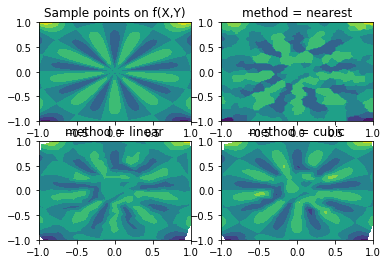

In [9]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

x = np.linspace(-1,1,100)
y =  np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)

def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s*(1-s)/5 * np.sin(9*phi) 
    return 5*(1-tau) + tau

T = f(X, Y)
#print(T)
# Choose npts random point from the discrete domain of our model function
npts = 400
px, py = np.random.choice(x, npts), np.random.choice(y, npts)
#print(f(px,py))
fig, ax = plt.subplots(nrows=2, ncols=2)
# Plot the model function and the randomly selected sample points
ax[0,0].contourf(X, Y, T)
#ax[0,0].scatter(px, py, c='k', alpha=0.2, marker='.')
ax[0,0].set_title('Sample points on f(X,Y)')

# Interpolate using three different methods and plot
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px, py), f(px,py), (X, Y), method=method)
    r, c = (i+1) // 2, (i+1) % 2
    ax[r,c].contourf(X, Y, Ti)
    ax[r,c].set_title('method = {}'.format(method))

plt.show()